### Cleaning Kaggle Spaceship Titanic dataset
(https://www.kaggle.com/competitions/spaceship-titanic/)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('datasets/spaceship_train.csv')
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


There are total 8693 entries in train dataset and only 'Transported' and 'PassengerID' features contain no NaN values.<br>
'Transported' feature can be either True or False. Let's check if dataset is balanced

In [5]:
df_train['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

There are near equal number of records. So training dataset is balanced.<br>
But there's also test dataset and it needs to be examined and "fixed" if necessary

In [6]:
df_test = pd.read_csv('datasets/spaceship_test.csv')
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


So in test dataset we have all the same columns but 'Transported'. It's predictable because these values are our final target.<br>
Also we see that test dataset contains huge number of NaNs. So it's necessary to analyze and try to replace them too.<br>
To perform "cleaning" we can concat both datasets. Hope this action will give us additional info to replace NaNs (e.g. about groups of passengers)

In [8]:
df = pd.concat([df_train, df_test], keys=['train', 'test'], names=['dataset', 'row_id'])
df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age  \
dataset row_id                                                              
train   0          0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0   
        1          0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0   
        2          0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   
        3          0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0   
        4          0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0   

                  VIP  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  \
dataset row_id                                                                
train   0       False          0.0        0.0           0.0     0.0     0.0   
        1       False        109.0        9.0          25.0   549.0    44.0   
        2        True         43.0     3576.0           0.0  6715.0    49.0   
        3       False          0.0     1283.0         371.0  3329.0   193.0   
        4       False        303.0       70.0         151.0   565.0     2.0   

                             Name Transported  
dataset row_id                                 
train   0         Maham Ofracculy       False  
        1            Juanna Vines        True  
        2           Altark Susent       False  
        3            Solam Susent       False  
        4       Willy Santantines        True

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 12970 entries, ('train', 0) to ('test', 4276)
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.7+ MB


#### Step 1. Clean datasets using 'CryoSleep' feature

Here we will try to replace as many NaNs as possible using 'CryoSleep' feature.<br>
First let's assume that people who are in CryoSleep cannot spend money. Now we will check this assumption using newly created feature - 'TotalSpent' - that sums all the features which contains info about money spent by passengers

In [10]:
df['TotalSpent'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']
df[(df['CryoSleep'] == True) & (df['TotalSpent'] > 0)]

,,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpent
dataset,row_id,,,,,,,,,,,,,,,


We can see that our assumption is true. So for records with CryoSleep==True we can use 0 as correct value to replace NaNs in columns 7-11

In [11]:
df[(df['CryoSleep'] == True) & df['TotalSpent'].isna()]

PassengerId HomePlanet CryoSleep     Cabin    Destination  \
dataset row_id                                                             
train   7          0006_02      Earth      True     G/0/S    TRAPPIST-1e   
        10         0008_02     Europa      True     B/1/P    TRAPPIST-1e   
        23         0020_03      Earth      True     E/0/S    55 Cancri e   
        25         0020_05      Earth      True     E/0/S  PSO J318.5-22   
        28         0024_01     Europa      True     C/2/S    TRAPPIST-1e   
...                    ...        ...       ...       ...            ...   
test    4171       9053_01     Europa      True   B/295/P    55 Cancri e   
        4188       9086_01      Earth      True  G/1462/S    TRAPPIST-1e   
        4198       9096_02      Earth      True  G/1466/S  PSO J318.5-22   
        4248       9223_01       Mars      True       NaN    TRAPPIST-1e   
        4255       9238_02      Earth      True  G/1501/P    55 Cancri e   

                 Age    VIP  RoomService  FoodCourt  ShoppingMall  Spa  \
dataset row_id                                                           
train   7       28.0  False          0.0        0.0           0.0  0.0   
        10      34.0  False          0.0        0.0           NaN  0.0   
        23      29.0  False          0.0        0.0           NaN  0.0   
        25       1.0  False          NaN        0.0           0.0  0.0   
        28      62.0  False          0.0        0.0           NaN  0.0   
...              ...    ...          ...        ...           ...  ...   
test    4171    25.0  False          NaN        0.0           0.0  0.0   
        4188    22.0  False          0.0        0.0           0.0  0.0   
        4198    24.0  False          0.0        0.0           NaN  0.0   
        4248    24.0  False          0.0        0.0           NaN  0.0   
        4255     3.0  False          NaN        0.0           0.0  0.0   

                VRDeck                Name Transported  TotalSpent  
dataset row_id                                                      
train   7          NaN  Candra Jacostaffey        True         NaN  
        10         0.0      Altardr Flatic        True         NaN  
        23         0.0  Mollen Mcfaddennon       False         NaN  
        25         0.0     Mael Brantuarez       False         NaN  
        28         0.0     Penton Fullided        True         NaN  
...                ...                 ...         ...         ...  
test    4171       0.0      Ankark Cableck         NaN         NaN  
        4188       NaN   Therry Craftstens         NaN         NaN  
        4198       0.0       Wally Sterson         NaN         NaN  
        4248       0.0          Weessh Sun         NaN         NaN  
        4255       0.0        Ricke Emenez         NaN         NaN  

[513 rows x 15 columns]

There are total 513 rows in both datasets with CryoSleep == True and NaN values in "money" columns

In [12]:
# Filling missing values in "money" columns by 0
money_columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
base_condition = df['CryoSleep'] == True
print('Replacing "money" NaN values in records where `CryoSleep`==True:')
print('- {} total records with NaN values BEFORE replacing'.format(len(df[base_condition & df['TotalSpent'].isna()])))
for col_name in money_columns:
    print('--- replacing in column {}: {} records with NaN'.format(col_name, len(df[base_condition & df[col_name].isna()])))
    df.loc[base_condition & df[col_name].isna(), col_name] = 0
    print('--- column {}: {} records with NaN remain'.format(col_name, len(df[base_condition & df[col_name].isna()])))

Replacing "money" NaN values in records where `CryoSleep`==True:
- 513 total records with NaN values BEFORE replacing
--- replacing in column RoomService: 93 records with NaN
--- column RoomService: 0 records with NaN remain
--- replacing in column FoodCourt: 109 records with NaN
--- column FoodCourt: 0 records with NaN remain
--- replacing in column ShoppingMall: 131 records with NaN
--- column ShoppingMall: 0 records with NaN remain
--- replacing in column Spa: 107 records with NaN
--- column Spa: 0 records with NaN remain
--- replacing in column VRDeck: 91 records with NaN
--- column VRDeck: 0 records with NaN remain


In [13]:
# Recalc TotalSpent values
df['TotalSpent'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']
print('- {} total records with NaN values AFTER replacing'.format(len(df[base_condition & df['TotalSpent'].isna()])))

- 0 total records with NaN values AFTER replacing


So all "money" columns for those who are in CryoSleep has been correctly filled with 0.<br>
That means roughly 513 NaN values less. Good start :)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 12970 entries, ('train', 0) to ('test', 4276)
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12800 non-null  float64
 8   FoodCourt     12790 non-null  float64
 9   ShoppingMall  12795 non-null  float64
 10  Spa           12793 non-null  float64
 11  VRDeck        12793 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
 14  TotalSpent    12120 non-null  float64
dtypes: float64(7), object(8)
memory usage: 1.8+ MB


The next question is reversed: can we replace NaNs in 'CryoSleep' with True if 'TotalSpent' value is equal to 0?<br>
Let's check it by making some filtered queries to dataset:<br>
1. find out how many NaN values are in 'CryoSleep' column
2. find out if there are any persons who is not in cryosleep and also has not spent any money
3. find out if there are any persons who is in cryosleep and somehow has spent some money

In [15]:
# Check different conditions with `CryoSleep` column
print('There are {} records with NaN values in `CryoSleep` column'.format(df['CryoSleep'].isna().sum()))
print('There are {} records with `CryoSleep` == False and `TotalSpent` == 0'.format(
    len(df[(df['CryoSleep'] == False) & (df['TotalSpent'] == 0)])))
print('There are {} records with `CryoSleep` == True and `TotalSpent` > 0'.format(
    len(df[(df['CryoSleep'] == True) & (df['TotalSpent'] > 0)])))

There are 310 records with NaN values in `CryoSleep` column
There are 667 records with `CryoSleep` == False and `TotalSpent` == 0
There are 0 records with `CryoSleep` == True and `TotalSpent` > 0


We thought we can use 'TotalSpent' == 0 condition to fill NaNs in 'CryoSleep' with True ("if person didn't spent any money then he/she is in CryoSleep"). But we can't do it because of 470 rows with both 'TotalSpend' == 0 and 'CryoSleep' == False (I don't know what these passengers ate and what they did during the flight)
<br>
But instead we can fill some NaNs in 'CryoSleep' with False if 'TotalSpent' > 0 (it makes sense because nobody can spend money during CryoSleep and this assumption is confirmed by 0 records with 'TotalSpent' > 0 while 'CryoSleep' == True)

In [16]:
print('There are {} records with `CryoSleep` is NaN and `TotalSpent` > 0 BEFORE cleaning'.format(
    len(df[df['CryoSleep'].isna() & (df['TotalSpent'] > 0)])))
df.loc[df['CryoSleep'].isna() & (df['TotalSpent'] > 0), 'CryoSleep'] = False
print('There are {} records with `CryoSleep` is NaN and `TotalSpent` > 0 AFTER cleaning'.format(
    len(df[df['CryoSleep'].isna() & (df['TotalSpent'] > 0)])))

There are 157 records with `CryoSleep` is NaN and `TotalSpent` > 0 BEFORE cleaning
There are 0 records with `CryoSleep` is NaN and `TotalSpent` > 0 AFTER cleaning


Another 157 NaN values has been cleaned successfully

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 12970 entries, ('train', 0) to ('test', 4276)
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12817 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12800 non-null  float64
 8   FoodCourt     12790 non-null  float64
 9   ShoppingMall  12795 non-null  float64
 10  Spa           12793 non-null  float64
 11  VRDeck        12793 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
 14  TotalSpent    12120 non-null  float64
dtypes: float64(7), object(8)
memory usage: 1.8+ MB


#### Step 2. Clean datasets using 'Cabin' feature

Another possibility is to find out if we can make any hypothesis about HomePlanet and Destination to replace NaNs based on other columns.<br>
From the description of the dataset we know that columns 'PassengerId' and 'Cabin' are composite.<br>
'PassengerId' also contains info about group and 'Cabin' contains info not only about cabin no. but also side and deck ids<br>
The group id can give info about HomePlanet and/or Destination if this group consists of 2 or more persons (they possibly will have same HomePlanet and/or Destination and/or VIP status).<br>
Splitting cabin data will also possibly provide extra information about these features (maybe we'll see if there are passengers of same social class, or groups with common properties which occupied some locations, or something like that)
<br>
So we have to add extra features to dataset by splitting columns 'PassengerId' and 'Cabin'

In [18]:
# Adding GroupId and HasGroup features
df['GroupId'] = df['PassengerId'].str.split(pat='_', expand=True).iloc[:, 0]

def has_group(value):
    return len(df[df['GroupId'] == value]) > 1

df['HasGroup'] = df['GroupId'].apply(has_group)

# Adding Deck, CabinNo and Side features
df['Deck'] = df['Cabin'].str.split(pat='/', expand=True).iloc[:, 0]
df['CabinNo'] = df['Cabin'].str.split(pat='/', expand=True).iloc[:, 1]
df['Side'] = df['Cabin'].str.split(pat='/', expand=True).iloc[:, 2]
df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age  \
dataset row_id                                                              
train   0          0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0   
        1          0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0   
        2          0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   
        3          0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0   
        4          0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0   

                  VIP  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  \
dataset row_id                                                                
train   0       False          0.0        0.0           0.0     0.0     0.0   
        1       False        109.0        9.0          25.0   549.0    44.0   
        2        True         43.0     3576.0           0.0  6715.0    49.0   
        3       False          0.0     1283.0         371.0  3329.0   193.0   
        4       False        303.0       70.0         151.0   565.0     2.0   

                             Name Transported  TotalSpent GroupId  HasGroup  \
dataset row_id                                                                
train   0         Maham Ofracculy       False         0.0    0001     False   
        1            Juanna Vines        True       736.0    0002     False   
        2           Altark Susent       False     10383.0    0003      True   
        3            Solam Susent       False      5176.0    0003      True   
        4       Willy Santantines        True      1091.0    0004     False   

               Deck CabinNo Side  
dataset row_id                    
train   0         B       0    P  
        1         F       0    S  
        2         A       0    S  
        3         A       0    S  
        4         F       1    S

In [19]:
print('Deck values:', df['Deck'].unique(), '. NaN values present: {}'.format(np.nan in list(df['Deck'].unique())))
print('CabinNo values:', df['CabinNo'].unique(), '. NaN values present: {}'.format(np.nan in list(df['CabinNo'].unique())))
print('Side values:', df['Side'].unique(), '. NaN values present: {}'.format(np.nan in list(df['Side'].unique())))

Deck values: ['B' 'F' 'A' 'G' nan 'E' 'D' 'C' 'T'] . NaN values present: True
CabinNo values: ['0' '1' '2' ... '1885' '1887' '1890'] . NaN values present: True
Side values: ['P' 'S' nan] . NaN values present: True


CabinNo column contains too many values to be used as generalization feature now. But Deck and Side columns has too few values. So we can create new feature by combining them

In [20]:
df['DeckNSide'] = df['Deck'] + '/' + df['Side']
df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age  \
dataset row_id                                                              
train   0          0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0   
        1          0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0   
        2          0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   
        3          0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0   
        4          0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0   

                  VIP  RoomService  FoodCourt  ShoppingMall  ...  VRDeck  \
dataset row_id                                               ...           
train   0       False          0.0        0.0           0.0  ...     0.0   
        1       False        109.0        9.0          25.0  ...    44.0   
        2        True         43.0     3576.0           0.0  ...    49.0   
        3       False          0.0     1283.0         371.0  ...   193.0   
        4       False        303.0       70.0         151.0  ...     2.0   

                             Name Transported TotalSpent  GroupId HasGroup  \
dataset row_id                                                               
train   0         Maham Ofracculy       False        0.0     0001    False   
        1            Juanna Vines        True      736.0     0002    False   
        2           Altark Susent       False    10383.0     0003     True   
        3            Solam Susent       False     5176.0     0003     True   
        4       Willy Santantines        True     1091.0     0004    False   

                Deck CabinNo Side DeckNSide  
dataset row_id                               
train   0          B       0    P       B/P  
        1          F       0    S       F/S  
        2          A       0    S       A/S  
        3          A       0    S       A/S  
        4          F       1    S       F/S  

[5 rows x 21 columns]

Now we have 6 new features we can use to make hypotheses.<br>
Let's see what's the distribution of HomePlanets between different decks and sides. For this I'll use scatterplot with 'Age' numeric axis to make charts more readable

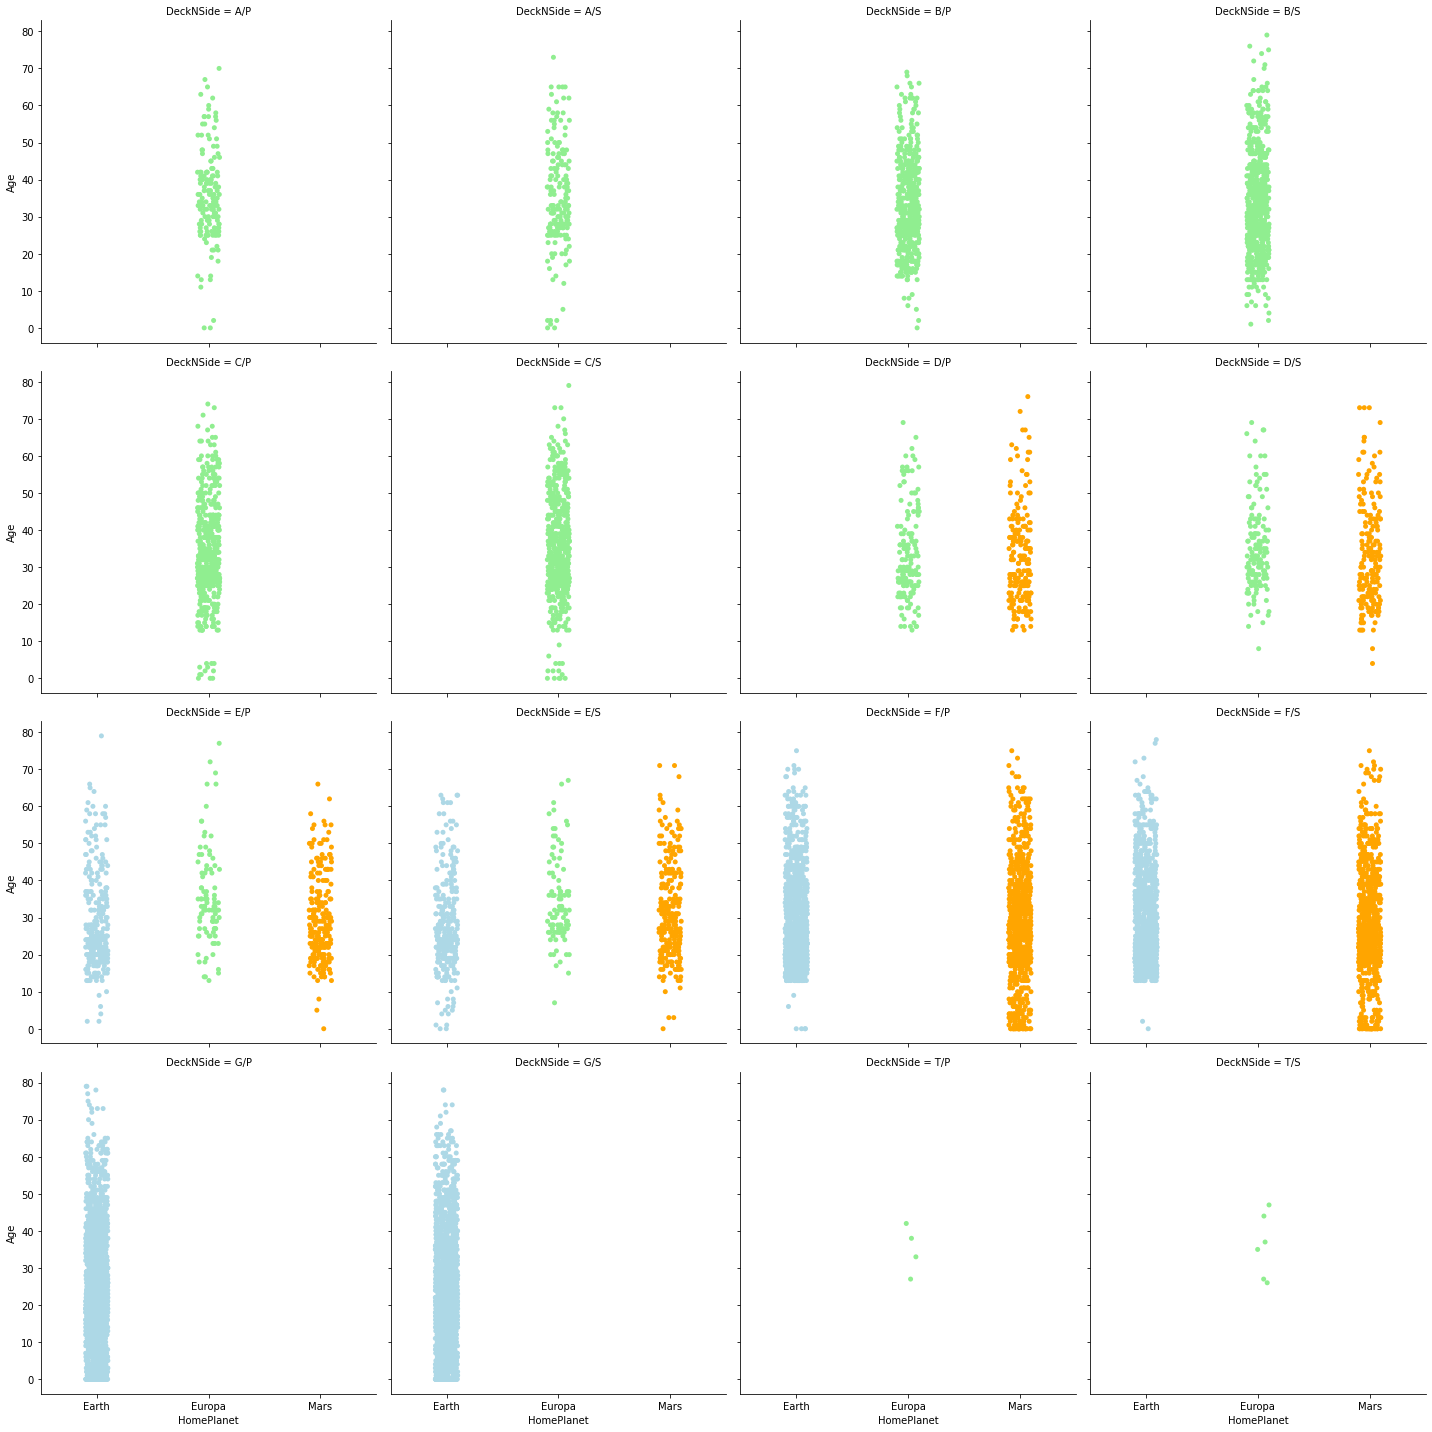

In [21]:
sns.catplot(x='HomePlanet', y='Age',
            hue='HomePlanet', kind='strip',
            data=df,
            order=sorted(list(df[df['HomePlanet'].notna()].HomePlanet.unique())),
            palette={'Earth': 'lightblue', 'Europa': 'lightgreen', 'Mars': 'orange'},
            col='DeckNSide', col_wrap=4,
            col_order=sorted(list(df[df['DeckNSide'].notna()].DeckNSide.unique()))
            )

Here we can see that decks A, B, C and T are occupied by passengers from Europa only as deck G is occupied by those from Earth.<br>
This gives us an opportunity to replace some NaNs in HomePlanet column.

In [22]:
print('There are total {} records with NaN HomePlanet'.format(len(df[df['HomePlanet'].isna()])))
print('There are {} records with NaN HomePlanet and deck "A", "B", "C" or "T" BEFORE cleaning'.format(len(df[df['HomePlanet'].isna() & df['Deck'].isin(['A', 'B', 'C', 'T'])])))
df.loc[df['HomePlanet'].isna() & df['Deck'].isin(['A', 'B', 'C', 'T']), 'HomePlanet'] = 'Europa'
print('There are {} records with NaN HomePlanet and deck "A", "B", "C" or "T" AFTER cleaning'.format(len(df[df['HomePlanet'].isna() & df['Deck'].isin(['A', 'B', 'C', 'T'])])))

print('There are {} records with NaN HomePlanet and deck "G" BEFORE cleaning'.format(len(df[df['HomePlanet'].isna() & df['Deck'].isin(['G'])])))
df.loc[df['HomePlanet'].isna() & df['Deck'].isin(['G']), 'HomePlanet'] = 'Earth'
print('There are {} records with NaN HomePlanet and deck "G" AFTER cleaning'.format(len(df[df['HomePlanet'].isna() & df['Deck'].isin(['G'])])))
df.info()

There are total 288 records with NaN HomePlanet
There are 47 records with NaN HomePlanet and deck "A", "B", "C" or "T" BEFORE cleaning
There are 0 records with NaN HomePlanet and deck "A", "B", "C" or "T" AFTER cleaning
There are 81 records with NaN HomePlanet and deck "G" BEFORE cleaning
There are 0 records with NaN HomePlanet and deck "G" AFTER cleaning
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 12970 entries, ('train', 0) to ('test', 4276)
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12810 non-null  object 
 2   CryoSleep     12817 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12800 non-null  float64
 8   FoodCourt     12790 non-null  float64
 9   ShoppingMall  12795 non-null  float

-128 NaN values :)<br>\
Let's see if we can make the same for Destination

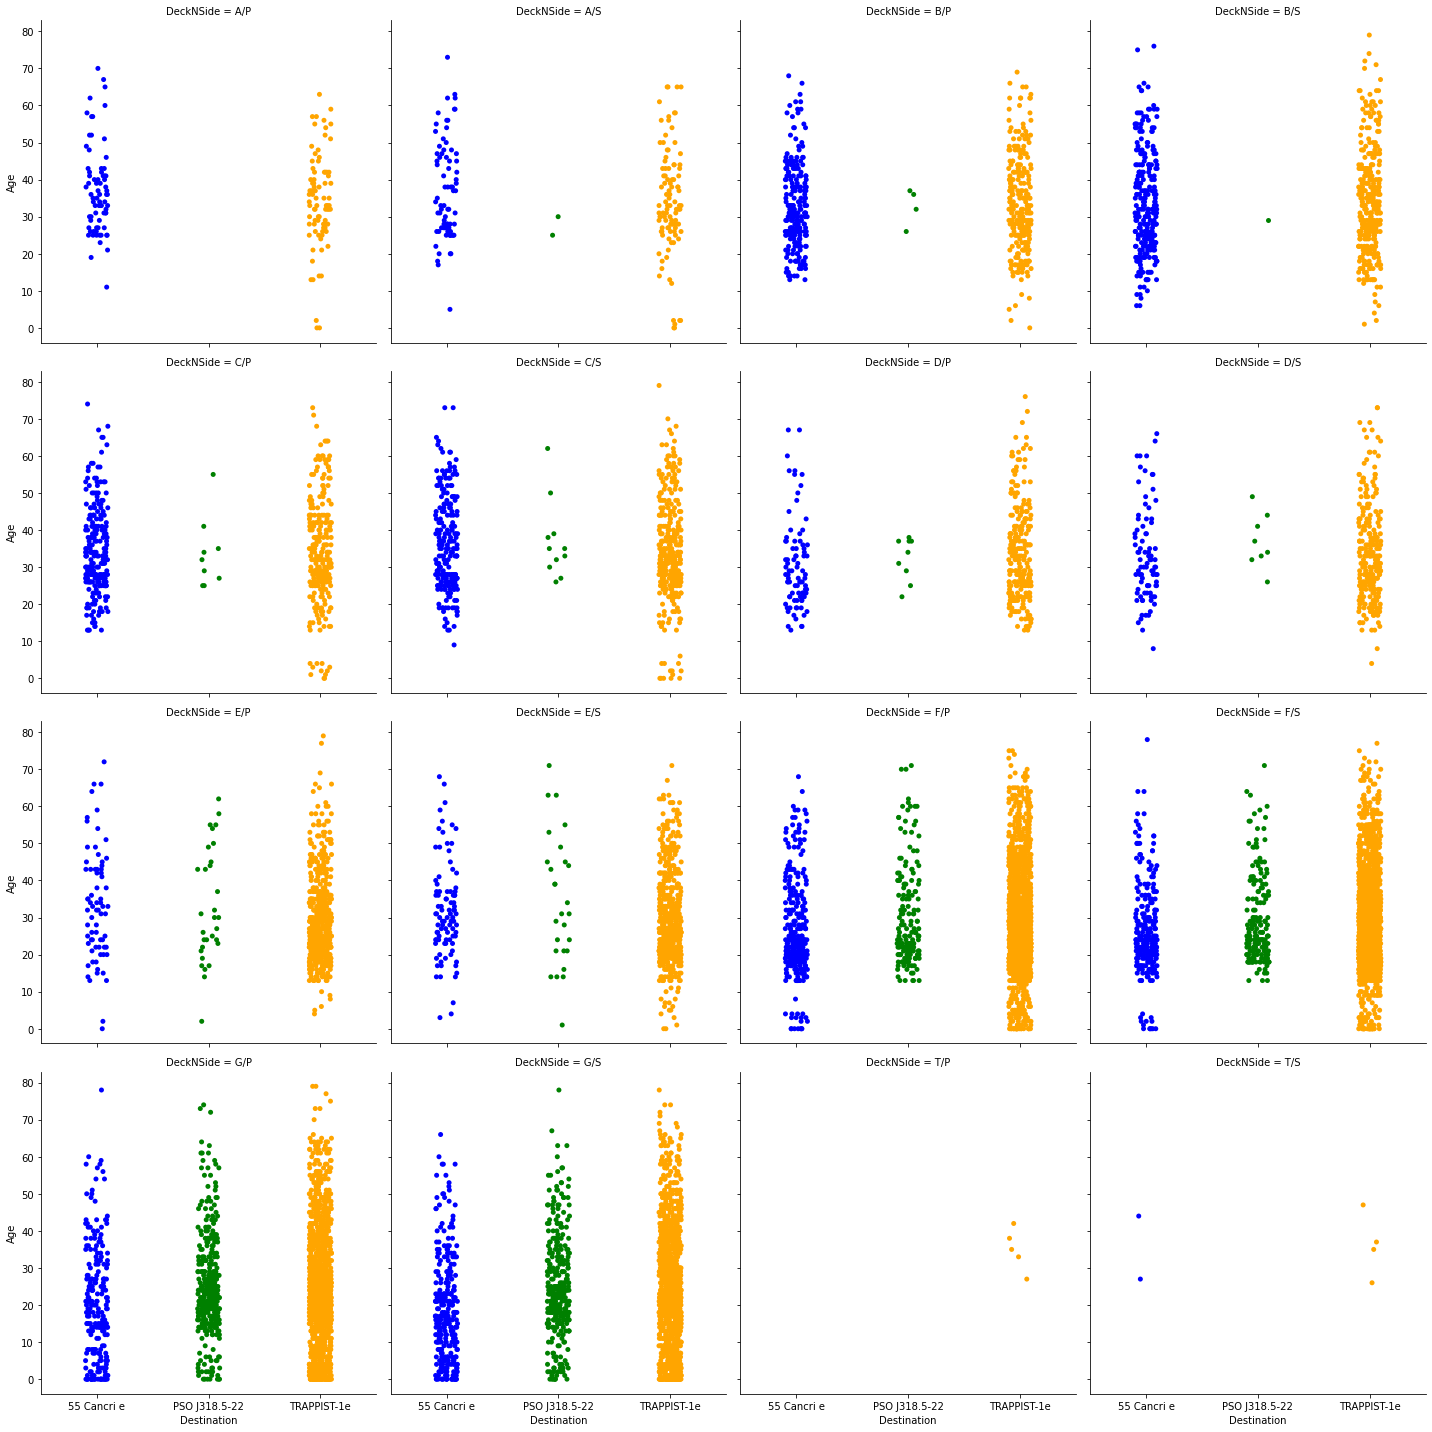

In [23]:
dest_list = sorted(list(df[df['Destination'].notna()].Destination.unique()))
sns.catplot(
    x='Destination', y='Age',
    hue='Destination', kind='strip',
    data=df,
    order=dest_list,
    palette=dict(zip(dest_list, ['blue', 'green', 'orange'])),
    col='DeckNSide', col_wrap=4,
    col_order=sorted(list(df[df['DeckNSide'].notna()].DeckNSide.unique()))
)

Unfortunately we can't use 'Cabin' feature for replacing NaNs in 'Destination' except of T/P value.<br>
Let's check if there are any NaNs in 'Destination' with T/P value in 'DeckNSide'

In [24]:
print(len(df[df['Destination'].isna() & df['DeckNSide'].isin(['T/P'])]))

0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 12970 entries, ('train', 0) to ('test', 4276)
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12810 non-null  object 
 2   CryoSleep     12817 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12800 non-null  float64
 8   FoodCourt     12790 non-null  float64
 9   ShoppingMall  12795 non-null  float64
 10  Spa           12793 non-null  float64
 11  VRDeck        12793 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
 14  TotalSpent    12120 non-null  float64
 15  GroupId       12970 non-null  object 
 16  HasGroup      12970 non-null  bool   
 17  Deck          12671 non-null  object 
 18  CabinN

#### Step 3. Clean datasets using GroupId and HasGroup features

There are some hypotheses about NaN values using GroupId and HasGroup.<br>
_Hypothesis 1_: Passengers from same group have same HomePlanet<br>
_Hypothesis 2_: Passengers from same group have same Destination<br>
_Hypothesis 3_: Passengers from same group have same CryoSleep status<br>
_Hypothesis 4_: Passengers from same group have same VIP status<br>
Let's check them

In [26]:
groups_mult_members = sorted(list(df[df['HasGroup'] == True]['GroupId'].unique()))
print('There are {} groups with multiple members'.format(len(groups_mult_members)))

There are 2135 groups with multiple members


To test all hypotheses at once we will create new dataframe. It should contain only groups with multiple members and features we want to test on. The values of this new dataframe will be number of unique values in each pair [group, feature] (NaNs excluded). So if the number of unique values through the column will be equal to 1 we will know that corresponding hypothesis is correct.<br>

In [27]:
features_to_test = ['HomePlanet', 'Destination', 'CryoSleep', 'VIP']
groups_df = df[df['HasGroup'] == True].groupby(by='GroupId', dropna=False)[features_to_test].agg(
    [pd.Series.nunique, lambda x: list(set(x))]
    )
groups_df.head()

HomePlanet            Destination  \
           nunique <lambda_0>     nunique   
GroupId                                     
0003             1   [Europa]           1   
0006             1    [Earth]           1   
0008             1   [Europa]           2   
0017             1    [Earth]           2   
0020             1    [Earth]           3   

                                                   CryoSleep                 \
                                        <lambda_0>   nunique     <lambda_0>   
GroupId                                                                       
0003                                 [TRAPPIST-1e]         1        [False]   
0006                                 [TRAPPIST-1e]         2  [False, True]   
0008                    [TRAPPIST-1e, 55 Cancri e]         2  [False, True]   
0017                    [TRAPPIST-1e, 55 Cancri e]         1        [False]   
0020     [TRAPPIST-1e, 55 Cancri e, PSO J318.5-22]         2  [False, True]   

            VIP                 
        nunique     <lambda_0>  
GroupId                         
0003          2  [False, True]  
0006          1        [False]  
0008          1        [False]  
0017          1        [False]  
0020          1        [False]

In [28]:
for feature in features_to_test:
    print('Info on feature `{}`:'.format(feature))
    print('- maximum unique values: {}'.format(groups_df[(feature, 'nunique')].max()))
    print('- minimum unique values: {}'.format(groups_df[(feature, 'nunique')].min()))

Info on feature `HomePlanet`:
- maximum unique values: 1
- minimum unique values: 0
Info on feature `Destination`:
- maximum unique values: 3
- minimum unique values: 1
Info on feature `CryoSleep`:
- maximum unique values: 2
- minimum unique values: 1
Info on feature `VIP`:
- maximum unique values: 2
- minimum unique values: 0


From results received we can see that only first hypothesis is correct. But there's also 0 unique values in some groups which means they contain only NaNs and thus cannot be replaced.<br>
So we can replace some NaNs in 'HomePlanet' feature only.

In [29]:
print('Number of NaN values in "HomePlanet" feature in multimember-groups BEFORE cleaning: {}'.format(
    len(df[df['GroupId'].isin(groups_mult_members) & df['HomePlanet'].isna()])
))
for group in groups_mult_members:
    if groups_df.loc[group, ('HomePlanet', 'nunique')] > 0:
        for value in groups_df.loc[group, ('HomePlanet', '<lambda_0>')]:
            if not value is np.nan:
                df.loc[(df['GroupId'] == group) & df['HomePlanet'].isna(), 'HomePlanet'] = value
print('Number of NaN values in "HomePlanet" feature in multimember-groups AFTER cleaning: {}'.format(
    len(df[df['GroupId'].isin(groups_mult_members) & df['HomePlanet'].isna()])
))

Number of NaN values in "HomePlanet" feature in multimember-groups BEFORE cleaning: 68
Number of NaN values in "HomePlanet" feature in multimember-groups AFTER cleaning: 2


In [30]:
df[df['GroupId'].isin(groups_mult_members) & df['HomePlanet'].isna()]

PassengerId HomePlanet CryoSleep     Cabin  Destination   Age  \
dataset row_id                                                                 
train   6917       7336_01        NaN     False  F/1411/S  TRAPPIST-1e  30.0   
        6918       7336_02        NaN     False  F/1411/S  TRAPPIST-1e  26.0   

                  VIP  RoomService  FoodCourt  ShoppingMall  ...  VRDeck  \
dataset row_id                                               ...           
train   6917    False          2.0        0.0           5.0  ...   962.0   
        6918    False          0.0        0.0         902.0  ...     0.0   

                          Name Transported TotalSpent  GroupId HasGroup  Deck  \
dataset row_id                                                                  
train   6917    Dianie Lambles       False      970.0     7336     True     F   
        6918    Tanley Leodger       False      902.0     7336     True     F   

               CabinNo Side DeckNSide  
dataset row_id                         
train   6917      1411    S       F/S  
        6918      1411    S       F/S  

[2 rows x 21 columns]

Here we save the intermediate dataset to keep all changes made

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 12970 entries, ('train', 0) to ('test', 4276)
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12876 non-null  object 
 2   CryoSleep     12817 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12800 non-null  float64
 8   FoodCourt     12790 non-null  float64
 9   ShoppingMall  12795 non-null  float64
 10  Spa           12793 non-null  float64
 11  VRDeck        12793 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
 14  TotalSpent    12120 non-null  float64
 15  GroupId       12970 non-null  object 
 16  HasGroup      12970 non-null  bool   
 17  Deck          12671 non-null  object 
 18  CabinN

#### Step 4. VIP status

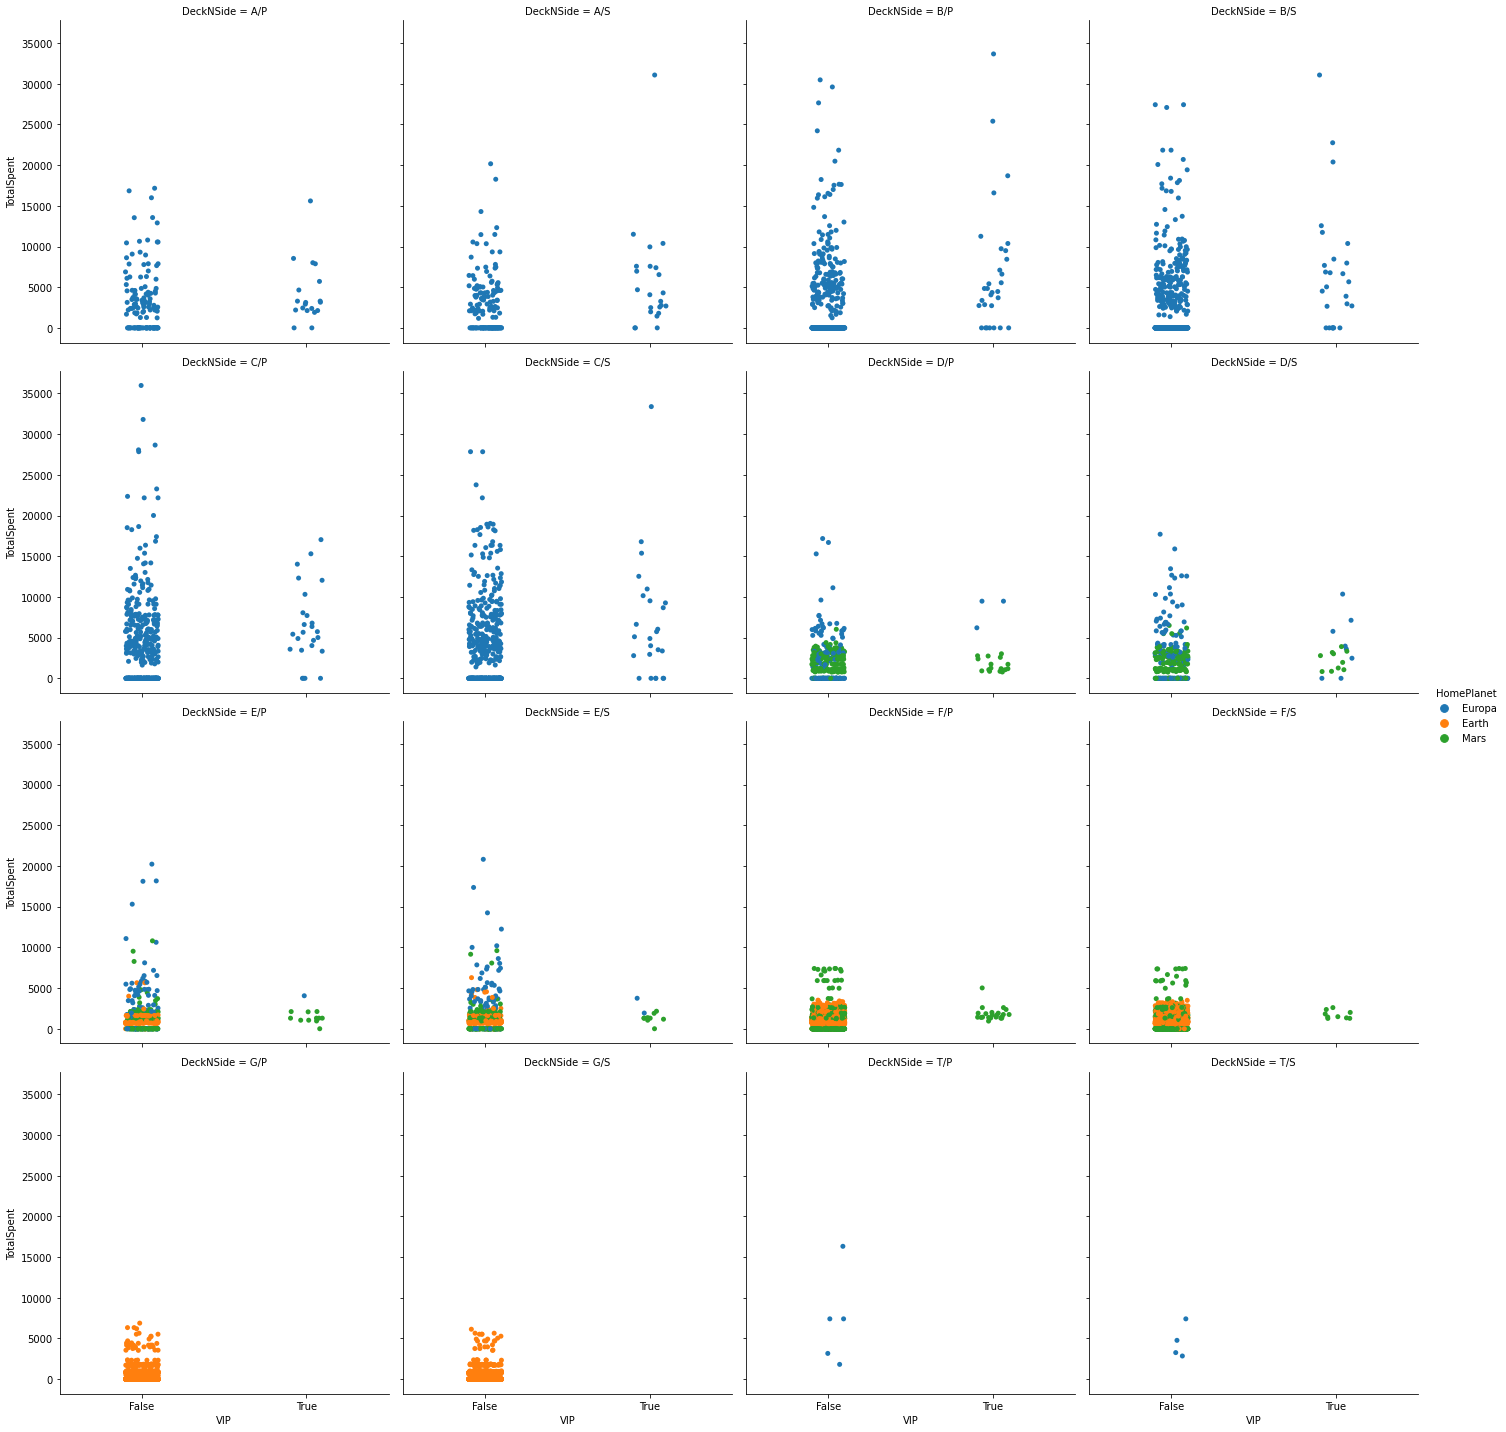

In [32]:
sns.catplot(
    x='VIP', y='TotalSpent',
    hue='HomePlanet', kind='strip',
    data=df,
    col='DeckNSide', col_wrap=4,
    col_order=sorted(list(df[df['DeckNSide'].notna()].DeckNSide.unique()))
)

The interesting thing is passengers from Earth do NOT have VIP status on all decks

In [33]:
df[df['HomePlanet'] == 'Earth']['VIP'].value_counts()

False    6804
Name: VIP, dtype: int64

In [34]:
df[(df['HomePlanet'] == 'Earth') & df['VIP'].isna()]

PassengerId HomePlanet CryoSleep     Cabin    Destination  \
dataset row_id                                                             
train   38         0036_01      Earth     False     F/8/S    55 Cancri e   
        102        0108_03      Earth     False    G/19/S    TRAPPIST-1e   
        646        0679_01      Earth     False   G/104/S    TRAPPIST-1e   
        649        0680_03      Earth      True   G/105/P    TRAPPIST-1e   
        780        0819_01      Earth      True   G/121/S  PSO J318.5-22   
...                    ...        ...       ...       ...            ...   
test    3810       8349_01      Earth     False   E/533/P    55 Cancri e   
        3833       8387_01      Earth     False   E/551/S    TRAPPIST-1e   
        3955       8601_01      Earth     False  G/1395/P    TRAPPIST-1e   
        4250       9228_01      Earth     False  F/1887/P    TRAPPIST-1e   
        4267       9260_01      Earth      True  G/1503/P    55 Cancri e   

                 Age  VIP  RoomService  FoodCourt  ShoppingMall  ...  VRDeck  \
dataset row_id                                                   ...           
train   38      15.0  NaN          0.0      492.0          48.0  ...   401.0   
        102      0.0  NaN          0.0        0.0           0.0  ...     0.0   
        646     20.0  NaN          NaN      215.0           0.0  ...     0.0   
        649      5.0  NaN          0.0        0.0           0.0  ...     0.0   
        780     23.0  NaN          0.0        0.0           0.0  ...     0.0   
...              ...  ...          ...        ...           ...  ...     ...   
test    3810    51.0  NaN         79.0       69.0           0.0  ...     1.0   
        3833    16.0  NaN          1.0      780.0           0.0  ...     9.0   
        3955    53.0  NaN         13.0        0.0          47.0  ...   748.0   
        4250    21.0  NaN        640.0        0.0          21.0  ...    76.0   
        4267     3.0  NaN          0.0        0.0           0.0  ...     0.0   

                              Name Transported TotalSpent  GroupId HasGroup  \
dataset row_id                                                                
train   38          Marina Leodger       False      961.0     0036    False   
        102        Oline Handertiz        True        0.0     0108     True   
        646           Vana Nichoan       False        NaN     0679    False   
        649      Joandy Camerrison       False        0.0     0680     True   
        780         Patsya Gainney        True        0.0     0819    False   
...                            ...         ...        ...      ...      ...   
test    3810    Elaney Mccarveymon         NaN      717.0     8349    False   
        3833        Ally Mckinsond         NaN      790.0     8387    False   
        3955     Lynnon Maystuarey         NaN      808.0     8601    False   
        4250     Davis Bulliamoses         NaN      737.0     9228    False   
        4267     Luisy Portananney         NaN        0.0     9260    False   

                Deck CabinNo Side DeckNSide  
dataset row_id                               
train   38         F       8    S       F/S  
        102        G      19    S       G/S  
        646        G     104    S       G/S  
        649        G     105    P       G/P  
        780        G     121    S       G/S  
...              ...     ...  ...       ...  
test    3810       E     533    P       E/P  
        3833       E     551    S       E/S  
        3955       G    1395    P       G/P  
        4250       F    1887    P       F/P  
        4267       G    1503    P       G/P  

[160 rows x 21 columns]

In [35]:
df.loc[(df['HomePlanet'] == 'Earth') & df['VIP'].isna(), 'VIP'] = False
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 12970 entries, ('train', 0) to ('test', 4276)
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12876 non-null  object 
 2   CryoSleep     12817 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12834 non-null  object 
 7   RoomService   12800 non-null  float64
 8   FoodCourt     12790 non-null  float64
 9   ShoppingMall  12795 non-null  float64
 10  Spa           12793 non-null  float64
 11  VRDeck        12793 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
 14  TotalSpent    12120 non-null  float64
 15  GroupId       12970 non-null  object 
 16  HasGroup      12970 non-null  bool   
 17  Deck          12671 non-null  object 
 18  CabinN

Examine relation between cryosleep and age for each homeplanet

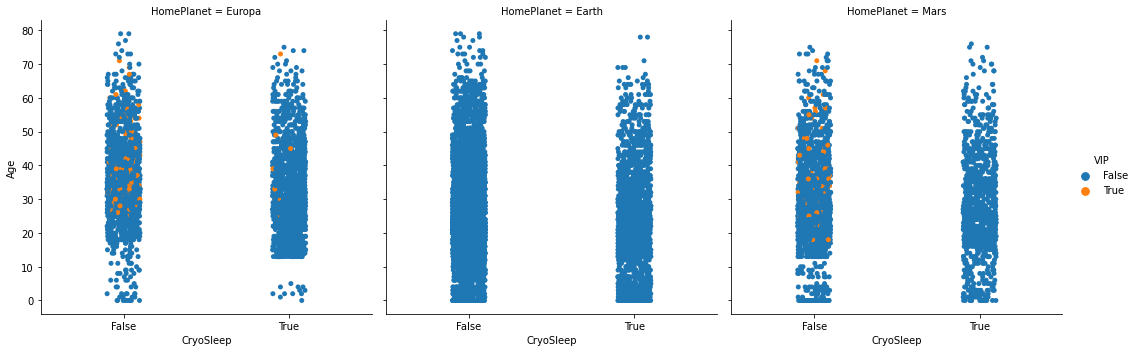

In [36]:
sns.catplot(
    x='CryoSleep', y='Age',
    hue='VIP', kind='strip',
    data=df,
    col='HomePlanet', col_wrap=3,
    #col_order=sorted(list(df[df['DeckNSide'].notna()].DeckNSide.unique()))
)

It seems no VIP from Mars used cryosleep

In [37]:
df[(df['HomePlanet'] == 'Mars') & (df['CryoSleep'] == True)]['VIP'].value_counts()

False    1028
Name: VIP, dtype: int64

In [38]:
df[(df['HomePlanet'] == 'Mars') & (df['CryoSleep'] == True) & df['VIP'].isna()]

PassengerId HomePlanet CryoSleep     Cabin    Destination  \
dataset row_id                                                             
train   145        0165_01       Mars      True    F/37/P    TRAPPIST-1e   
        228        0244_02       Mars      True    F/47/S    55 Cancri e   
        1001       1065_01       Mars      True   F/202/S    TRAPPIST-1e   
        2007       2142_01       Mars      True   F/418/S    TRAPPIST-1e   
        2273       2442_01       Mars      True   F/505/P    TRAPPIST-1e   
        2341       2521_01       Mars      True   E/151/P    TRAPPIST-1e   
        2342       2522_01       Mars      True   F/520/P    TRAPPIST-1e   
        3287       3531_02       Mars      True   F/731/P    TRAPPIST-1e   
        4643       4943_01       Mars      True  F/1009/P    TRAPPIST-1e   
        5535       5900_03       Mars      True  F/1220/P    TRAPPIST-1e   
        5713       6054_01       Mars      True  F/1151/S    TRAPPIST-1e   
        5771       6112_01       Mars      True  F/1264/P    TRAPPIST-1e   
        6896       7304_01       Mars      True  F/1512/P    TRAPPIST-1e   
        7032       7488_02       Mars      True   E/486/P  PSO J318.5-22   
        7981       8537_03       Mars      True  F/1643/S    TRAPPIST-1e   
        8015       8574_05       Mars      True  F/1653/S    55 Cancri e   
        8144       8704_01       Mars      True  F/1686/S    TRAPPIST-1e   
        8149       8712_01       Mars      True  F/1792/P    TRAPPIST-1e   
test    171        0351_01       Mars      True    F/77/P    TRAPPIST-1e   
        877        1820_01       Mars      True   E/110/P    TRAPPIST-1e   
        1640       3532_01       Mars      True   F/667/S    TRAPPIST-1e   
        1879       4015_01       Mars      True   F/831/P    TRAPPIST-1e   
        2243       4854_01       Mars      True   F/919/S    TRAPPIST-1e   
        4051       8804_01       Mars      True  F/1814/P    TRAPPIST-1e   

                 Age  VIP  RoomService  FoodCourt  ShoppingMall  ...  VRDeck  \
dataset row_id                                                   ...           
train   145     35.0  NaN          0.0        0.0           0.0  ...     0.0   
        228     14.0  NaN          0.0        0.0           0.0  ...     0.0   
        1001     NaN  NaN          0.0        0.0           0.0  ...     0.0   
        2007    39.0  NaN          0.0        0.0           0.0  ...     0.0   
        2273    34.0  NaN          0.0        0.0           0.0  ...     0.0   
        2341    43.0  NaN          0.0        0.0           0.0  ...     0.0   
        2342    20.0  NaN          0.0        0.0           0.0  ...     0.0   
        3287    45.0  NaN          0.0        0.0           0.0  ...     0.0   
        4643    20.0  NaN          0.0        0.0           0.0  ...     0.0   
        5535     6.0  NaN          0.0        0.0           0.0  ...     0.0   
        5713    28.0  NaN          0.0        0.0           0.0  ...     0.0   
        5771    36.0  NaN          0.0        0.0           0.0  ...     0.0   
        6896    10.0  NaN          0.0        0.0           0.0  ...     0.0   
        7032    45.0  NaN          0.0        0.0           0.0  ...     0.0   
        7981    16.0  NaN          0.0        0.0           0.0  ...     0.0   
        8015    29.0  NaN          0.0        0.0           0.0  ...     0.0   
        8144    36.0  NaN          0.0        0.0           0.0  ...     0.0   
        8149    14.0  NaN          0.0        0.0           0.0  ...     0.0   
test    171     41.0  NaN          0.0        0.0           0.0  ...     0.0   
        877     25.0  NaN          0.0        0.0           0.0  ...     0.0   
        1640     NaN  NaN          0.0        0.0           0.0  ...     0.0   
        1879    31.0  NaN          0.0        0.0           0.0  ...     0.0   
        2243    23.0  NaN          0.0        0.0           0.0  ...     0.0   
        4051    20.0  NaN          0.0

In [39]:
# Repacing VIP NaNs with False for Martians in CryoSleep
df.loc[(df['HomePlanet'] == 'Mars') & (df['CryoSleep'] == True) & df['VIP'].isna(), 'VIP'] = False

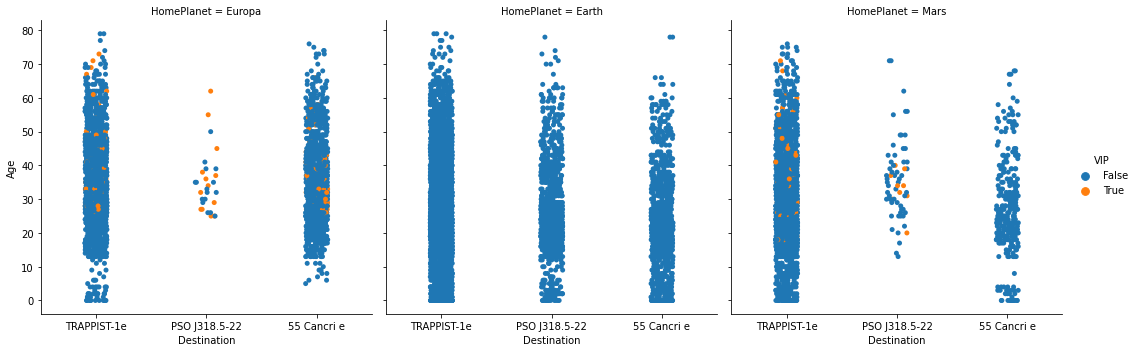

In [40]:
sns.catplot(
    x='Destination', y='Age',
    hue='VIP', kind='strip',
    data=df,
    col='HomePlanet', col_wrap=3,
    #col_order=sorted(list(df[df['DeckNSide'].notna()].DeckNSide.unique()))
)

Martians with Destination == '55 Cancri e' => NOT VIP

In [41]:
df[(df['HomePlanet'] == 'Mars') & (df['Destination'] == '55 Cancri e') & df['VIP'].isna()]

PassengerId HomePlanet CryoSleep    Cabin  Destination   Age  \
dataset row_id                                                                
train   3092       3332_01       Mars     False  D/107/S  55 Cancri e  48.0   
        4460       4741_02       Mars     False  F/961/P  55 Cancri e   0.0   

                VIP  RoomService  FoodCourt  ShoppingMall  ...  VRDeck  \
dataset row_id                                             ...           
train   3092    NaN        824.0        2.0         830.0  ...     0.0   
        4460    NaN          0.0        0.0           0.0  ...     0.0   

                      Name Transported TotalSpent  GroupId HasGroup  Deck  \
dataset row_id                                                              
train   3092    Blat Flité       False     1954.0     3332     True     D   
        4460      Chal Bau        True        0.0     4741     True     F   

               CabinNo Side DeckNSide  
dataset row_id                         
train   3092       107    S       D/S  
        4460       961    P       F/P  

[2 rows x 21 columns]

In [42]:
# Repacing VIP NaNs with False for Martians with Destination == 55 Cancri e
df.loc[(df['HomePlanet'] == 'Mars') & (df['Destination'] == '55 Cancri e') & df['VIP'].isna(), 'VIP'] = False

Let's create new feature 'Route' to see if we get some insights from the combination of HomePlanet and Destination with some other features

In [43]:
df['Route'] = df['HomePlanet'] + '->' + df['Destination']

Let's check newly created feature in combination with CryoSleep == False filter

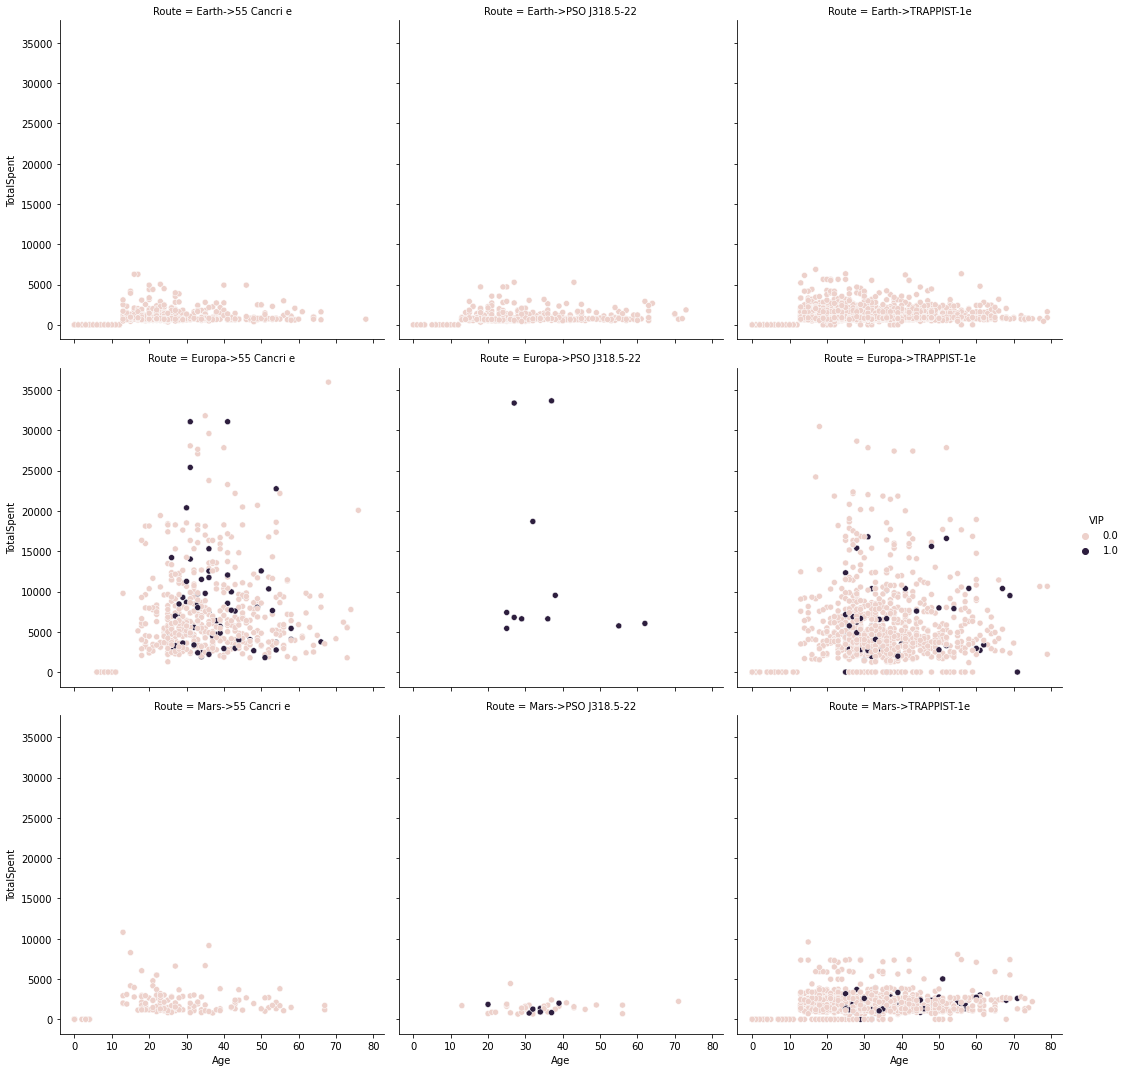

In [44]:
sns.relplot(
    x='Age', y='TotalSpent',
    hue='VIP',
    data=df[df['CryoSleep'] == False].sort_values(by='Route'),
    col='Route', col_wrap=3
)

Here we can see that there is an age level below which there is no spendings. It makes sense because children cannot pay by themselves. So we can find that age and use it to clean some NaN values in spendings

In [45]:
print('Number of records with TotalSpent > 0 for each age below 17')
for age in sorted([x for x in df['Age'].unique() if x <= 17]):
    print('Age {}. Num of records with TotalSpent > 0: {}'.format(age, len(df[(df['Age'] == age) & (df['TotalSpent'] > 0)])))

Number of records with TotalSpent > 0 for each age below 17
Age 0.0. Num of records with TotalSpent > 0: 0
Age 1.0. Num of records with TotalSpent > 0: 0
Age 2.0. Num of records with TotalSpent > 0: 0
Age 3.0. Num of records with TotalSpent > 0: 0
Age 4.0. Num of records with TotalSpent > 0: 0
Age 5.0. Num of records with TotalSpent > 0: 0
Age 6.0. Num of records with TotalSpent > 0: 0
Age 7.0. Num of records with TotalSpent > 0: 0
Age 8.0. Num of records with TotalSpent > 0: 0
Age 9.0. Num of records with TotalSpent > 0: 0
Age 10.0. Num of records with TotalSpent > 0: 0
Age 11.0. Num of records with TotalSpent > 0: 0
Age 12.0. Num of records with TotalSpent > 0: 0
Age 13.0. Num of records with TotalSpent > 0: 103
Age 14.0. Num of records with TotalSpent > 0: 85
Age 15.0. Num of records with TotalSpent > 0: 109
Age 16.0. Num of records with TotalSpent > 0: 92
Age 17.0. Num of records with TotalSpent > 0: 112


So for age of 13 and up it's possible to passengers to pay by themselves. Let's check if there is any records with Age<13 and TotalSpent == NaN

In [46]:
len(df[(df['Age'] < 13) & df['TotalSpent'].isna()])

65

We can additionally clean 65 records

In [47]:
df.loc[(df['Age'] < 13) & df['TotalSpent'].isna(), ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = 0
# Recalc TotalSpent values
df['TotalSpent'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']

In [48]:
def get_df_nans(df):
    features_nan = {}
    for column in df.columns:
        features_nan[column] = df[column].isna().sum()
    
    return features_nan

In [49]:
print(dict(sorted(get_df_nans(df).items(), key=lambda item: item[1], reverse=True)))

{'Transported': 4277, 'TotalSpent': 785, 'Route': 367, 'Cabin': 299, 'Deck': 299, 'CabinNo': 299, 'Side': 299, 'DeckNSide': 299, 'Name': 294, 'Destination': 274, 'Age': 270, 'FoodCourt': 171, 'Spa': 166, 'ShoppingMall': 163, 'RoomService': 162, 'CryoSleep': 153, 'VRDeck': 150, 'VIP': 110, 'HomePlanet': 94, 'PassengerId': 0, 'GroupId': 0, 'HasGroup': 0}


In [50]:
pd.pivot_table(df, values='Transported', index=['HomePlanet', 'Destination'], columns=['CryoSleep', 'VIP'], aggfunc='count', dropna=False, margins=True)

CryoSleep                  False           True         All
VIP                        False   True   False  True      
HomePlanet Destination                                     
Earth      55 Cancri e     482.0    NaN   208.0   NaN   696
           PSO J318.5-22   350.0    NaN   362.0   NaN   723
           TRAPPIST-1e    2287.0    NaN   828.0   NaN  3154
Europa     55 Cancri e     380.0   52.0   429.0  11.0   900
           PSO J318.5-22     NaN   10.0     9.0   NaN    19
           TRAPPIST-1e     671.0   47.0   440.0   9.0  1212
Mars       55 Cancri e     115.0    NaN    76.0   NaN   194
           PSO J318.5-22    29.0    8.0    11.0   NaN    50
           TRAPPIST-1e     833.0   56.0   574.0   NaN  1501
All                       5321.0  177.0  2997.0  21.0  8693

In [51]:
df.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalSpent,HasGroup
Age,1.000000,0.067976,0.124232,0.035373,0.118528,0.101910,0.180638,-0.129017
RoomService,0.067976,1.000000,-0.018412,0.059243,0.010517,-0.022264,0.226915,-0.011740
FoodCourt,0.124232,-0.018412,1.000000,0.000135,0.230092,0.245308,0.750469,0.059541
ShoppingMall,0.035373,0.059243,0.000135,1.000000,0.012150,0.006031,0.237059,-0.030407
Spa,0.118528,0.010517,0.230092,0.012150,1.000000,0.151005,0.600196,0.044865
VRDeck,0.101910,-0.022264,0.245308,0.006031,0.151005,1.000000,0.590258,0.042867
TotalSpent,0.180638,0.226915,0.750469,0.237059,0.600196,0.590258,1.000000,0.056859
HasGroup,-0.129017,-0.011740,0.059541,-0.030407,0.044865,0.042867,0.056859,1.000000


#### Step 5. Other analysis

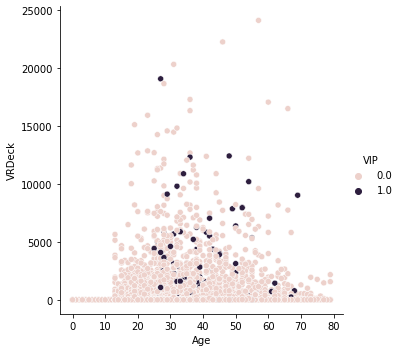

In [52]:
sns.relplot(
    data=df,
    x='Age', y='VRDeck',
    hue='VIP'
    )

<AxesSubplot:>

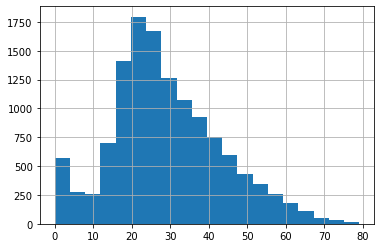

In [53]:
df['Age'].hist(bins=20)

c:\Applications\.venv\DataScience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


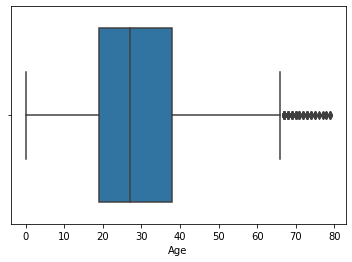

In [54]:
sns.boxplot(df['Age']);

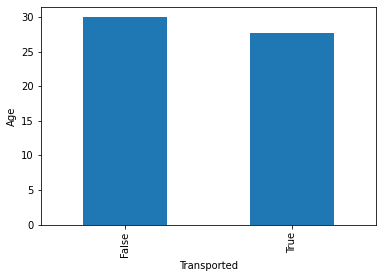

In [55]:
df.groupby('Transported')['Age'].mean().plot(kind='bar')
plt.ylabel('Age')
plt.show();

Nothing useful.
Let's check if there are missing values that can be restored from same group id

In [56]:
groups = df['GroupId'].unique()
groups

array(['0001', '0002', '0003', ..., '9271', '9273', '9277'], dtype=object)

In [57]:
groups_greater_1 = []
for group in groups:
    if len(df[df['GroupId'] == group]) > 1:
        groups_greater_1.append(group)
print('Found {} groups greater than 1'.format(len(groups_greater_1)))

Found 2135 groups greater than 1


In [58]:
df[df['GroupId'].isin(groups_greater_1) & ~df['HomePlanet'].isna()]['GroupId']

dataset  row_id
train    2         0003
         3         0003
         6         0006
         7         0006
         9         0008
                   ... 
test     4258      9238
         4259      9238
         4260      9238
         4271      9266
         4272      9266
Name: GroupId, Length: 5823, dtype: object

In [59]:
groups_different_home = []
groups_home_planet = {}
groups_different_destination = []
for group in groups_greater_1:
    temp_df = df[(df['GroupId'] == group) & df['HomePlanet'].notna()]
    if len(temp_df['Destination'].unique()) > 0:
        groups_home_planet[group] = temp_df['HomePlanet'].unique()[0]
    if len(temp_df['Destination'].unique()) > 1:
        groups_different_destination.append(group)
print('Found {} groups with different HomePlanet'.format(len(groups_different_home)))
print('Found {} groups with different Destination'.format(len(groups_different_destination)))
print('Found {} home planets for groups'.format(len(groups_home_planet.keys())))

Found 0 groups with different HomePlanet
Found 1153 groups with different Destination
Found 2134 home planets for groups


Renaming Destinations to more comfortable names

In [60]:
df['Destination']

dataset  row_id
train    0           TRAPPIST-1e
         1           TRAPPIST-1e
         2           TRAPPIST-1e
         3           TRAPPIST-1e
         4           TRAPPIST-1e
                       ...      
test     4272        TRAPPIST-1e
         4273        TRAPPIST-1e
         4274        55 Cancri e
         4275                NaN
         4276      PSO J318.5-22
Name: Destination, Length: 12970, dtype: object

In [65]:
def encode_dest(x):
    dest_codes = {'TRAPPIST-1e': 'Trappist', '55 Cancri e': 'Cancri', 'PSO J318.5-22': 'PSO', np.NaN: np.NaN}
    return dest_codes[x]
#df['Destination'] = df['Destination'].apply(encode_dest)
df['Destination'] = df['Destination'].map({'TRAPPIST-1e': 'Trappist', '55 Cancri e': 'Cancri', 'PSO J318.5-22': 'PSO'})
df['Destination']

dataset  row_id
train    0         Trappist
         1         Trappist
         2         Trappist
         3         Trappist
         4         Trappist
                     ...   
test     4272      Trappist
         4273      Trappist
         4274        Cancri
         4275           NaN
         4276           PSO
Name: Destination, Length: 12970, dtype: object

In [67]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'TotalSpent', 'GroupId', 'HasGroup', 'Deck',
       'CabinNo', 'Side', 'DeckNSide', 'Route'],
      dtype='object')

In [68]:
ml_train_columns = ['HomePlanet', 'Destination', 'CryoSleep', 'Age', 'VIP', 'TotalSpent', 'HasGroup', 'Deck', 'Side', 'CabinNo', 'Transported']
ml_test_columns = ml_train_columns[:-1]

#### Step 6. Encoding categorical values and imputing remaining NaN values

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer, MissingIndicator

In [ ]:
enc = OrdinalEncoder()


In [ ]:
imputer = KNNImputer(n_neighbors=3, weights='uniform')
imputer.fit_transform()

#### Step 6 (variant 1). Transforming object(category)-type columns to dummy variables

In [60]:
df = pd.get_dummies(df, columns=['HomePlanet', 'Destination', 'Deck', 'Side'], prefix=['Home', 'Dest', 'Deck', 'Side'])
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 12970 entries, ('train', 0) to ('test', 4276)
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         12970 non-null  object 
 1   CryoSleep           12817 non-null  object 
 2   Cabin               12671 non-null  object 
 3   Age                 12700 non-null  float64
 4   VIP                 12860 non-null  object 
 5   RoomService         12808 non-null  float64
 6   FoodCourt           12799 non-null  float64
 7   ShoppingMall        12807 non-null  float64
 8   Spa                 12804 non-null  float64
 9   VRDeck              12820 non-null  float64
 10  Name                12676 non-null  object 
 11  Transported         8693 non-null   object 
 12  TotalSpent          12185 non-null  float64
 13  GroupId             12970 non-null  object 
 14  HasGroup            12970 non-null  bool   
 15  CabinNo             12671 non-nul

In [ ]:
df_train = df.loc[('train',)]
df_test = df.loc[('test',)]

#### Step 6 (variant 2). Encoding category labels

#### Step 8. Saving resulting datasets to use in models

In [177]:
df.dropna(axis=0)
df.loc[('train',), ml_train_columns].to_csv('datasets/dataset_train_mod.csv')
df.loc[('test',), ml_test_columns].to_csv('datasets/dataset_test_mod.csv')